# Data Exploration
Data Source: [Allen Brain Atlas](https://portal.brain-map.org/)

Instructions for downloading the data can be found here: https://alleninstitute.github.io/abc_atlas_access/notebooks/getting_started.html

In [3]:
import scanpy as sc
import scvi
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from pathlib import Path
from abc_atlas_access.abc_atlas_cache.abc_project_cache import AbcProjectCache

/home/jantine/miniconda3/envs/scvi_project/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/jantine/miniconda3/envs/scvi_project/lib/python3.11/site-packages/docrep/decorators.py:43: SyntaxWarning: 'param_categorical_covariate_keys' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)
/home/jantine/miniconda3/envs/scvi_project/lib/python3.11/site-packages/docrep/decorators.py:43: SyntaxWarning: 'param_continuous_covariate_keys' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)


In [4]:
download_base = Path("/home/jantine/Data/AllenBrain/abc_atlas")
abc_cache = AbcProjectCache.from_cache_dir(download_base)

abc_cache.current_manifest

'releases/20250331/manifest.json'

In [5]:
abc_cache.list_manifest_file_names

['releases/20230630/manifest.json',
 'releases/20230830/manifest.json',
 'releases/20231215/manifest.json',
 'releases/20240330/manifest.json',
 'releases/20240831/manifest.json',
 'releases/20241115/manifest.json',
 'releases/20241130/manifest.json',
 'releases/20250131/manifest.json',
 'releases/20250331/manifest.json']

In [6]:
# Return to the latest manifest
abc_cache.load_latest_manifest()
print("after latest manifest loaded:", abc_cache.current_manifest)

after latest manifest loaded: releases/20250331/manifest.json


In [7]:
abc_cache.list_directories  # I need WMB-10Xv3

['ASAP-PMDBS-10X',
 'ASAP-PMDBS-taxonomy',
 'Allen-CCF-2020',
 'MERFISH-C57BL6J-638850',
 'MERFISH-C57BL6J-638850-CCF',
 'MERFISH-C57BL6J-638850-imputed',
 'MERFISH-C57BL6J-638850-sections',
 'SEAAD',
 'SEAAD-taxonomy',
 'WHB-10Xv3',
 'WHB-taxonomy',
 'WMB-10X',
 'WMB-10XMulti',
 'WMB-10Xv2',
 'WMB-10Xv3',
 'WMB-neighborhoods',
 'WMB-taxonomy',
 'Zeng-Aging-Mouse-10Xv3',
 'Zeng-Aging-Mouse-WMB-taxonomy',
 'Zhuang-ABCA-1',
 'Zhuang-ABCA-1-CCF',
 'Zhuang-ABCA-2',
 'Zhuang-ABCA-2-CCF',
 'Zhuang-ABCA-3',
 'Zhuang-ABCA-3-CCF',
 'Zhuang-ABCA-4',
 'Zhuang-ABCA-4-CCF']

In [8]:
abc_cache.list_data_files('WMB-10Xv3')

['WMB-10Xv3-CB/log2',
 'WMB-10Xv3-CB/raw',
 'WMB-10Xv3-CTXsp/log2',
 'WMB-10Xv3-CTXsp/raw',
 'WMB-10Xv3-HPF/log2',
 'WMB-10Xv3-HPF/raw',
 'WMB-10Xv3-HY/log2',
 'WMB-10Xv3-HY/raw',
 'WMB-10Xv3-Isocortex-1/log2',
 'WMB-10Xv3-Isocortex-1/raw',
 'WMB-10Xv3-Isocortex-2/log2',
 'WMB-10Xv3-Isocortex-2/raw',
 'WMB-10Xv3-MB/log2',
 'WMB-10Xv3-MB/raw',
 'WMB-10Xv3-MY/log2',
 'WMB-10Xv3-MY/raw',
 'WMB-10Xv3-OLF/log2',
 'WMB-10Xv3-OLF/raw',
 'WMB-10Xv3-P/log2',
 'WMB-10Xv3-P/raw',
 'WMB-10Xv3-PAL/log2',
 'WMB-10Xv3-PAL/raw',
 'WMB-10Xv3-STR/log2',
 'WMB-10Xv3-STR/raw',
 'WMB-10Xv3-TH/log2',
 'WMB-10Xv3-TH/raw']

In [9]:
# Check amount of total data 
abc_cache.get_directory_data_size('WMB-10Xv3')

'176.41 GB'

In [10]:
# List metadata files
abc_cache.list_metadata_files("WMB-taxonomy")

['cluster',
 'cluster_annotation_term',
 'cluster_annotation_term_set',
 'cluster_annotation_term_with_counts',
 'cluster_to_cluster_annotation_membership',
 'cluster_to_cluster_annotation_membership_color',
 'cluster_to_cluster_annotation_membership_pivoted']

In [11]:
# Size of metadata
abc_cache.get_directory_metadata_size("WMB-taxonomy")

'4.65 MB'

## Download the files

In [12]:
allen_wmb_data = abc_cache.get_directory_data('WMB-10Xv3')
print("WMB-10Xv3 data files:\n\t", allen_wmb_data)

WMB-10Xv3 data files:
	 [PosixPath('/home/jantine/Data/AllenBrain/abc_atlas/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-CB-log2.h5ad'), PosixPath('/home/jantine/Data/AllenBrain/abc_atlas/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-CB-raw.h5ad'), PosixPath('/home/jantine/Data/AllenBrain/abc_atlas/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-CTXsp-log2.h5ad'), PosixPath('/home/jantine/Data/AllenBrain/abc_atlas/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-CTXsp-raw.h5ad'), PosixPath('/home/jantine/Data/AllenBrain/abc_atlas/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-HPF-log2.h5ad'), PosixPath('/home/jantine/Data/AllenBrain/abc_atlas/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-HPF-raw.h5ad'), PosixPath('/home/jantine/Data/AllenBrain/abc_atlas/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-HY-log2.h5ad'), PosixPath('/home/jantine/Data/AllenBrain/abc_atlas/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-HY-raw.h5ad'), PosixPath('/home/jantine/Data/AllenBrain/ab

/home/jantine/miniconda3/envs/scvi_project/lib/python3.11/site-packages/abc_atlas_access/abc_atlas_cache/abc_project_cache.py:385: LargeDataSizeWarning: WMB-10Xv3 contains a significant amount of data.Continue this download only if you are sure you have enough space on your system.

	Total directory size = 176.41 GB


  warnings.warn(


In [ ]:
allen_wmb_metadata = abc_cache.get_directory_metadata('WMB-taxonomy')
print("WMB metadata files:\n\t", allen_wmb_metadata)

cluster.csv: 100%|██████████| 131k/131k [00:00<00:00, 211kMB/s]  
cluster_annotation_term.csv: 100%|██████████| 861k/861k [00:00<00:00, 1.44MMB/s] 
cluster_annotation_term_set.csv: 100%|██████████| 1.11k/1.11k [00:00<00:00, 5.69kMB/s]
cluster_annotation_term_with_counts.csv: 100%|██████████| 902k/902k [00:00<00:00, 2.98MMB/s] 
cluster_to_cluster_annotation_membership.csv: 100%|██████████| 2.21M/2.21M [00:00<00:00, 4.49MMB/s]
cluster_to_cluster_annotation_membership_color.csv: 100%|██████████| 239k/239k [00:00<00:00, 934kMB/s]  
cluster_to_cluster_annotation_membership_pivoted.csv: 100%|██████████| 531k/531k [00:00<00:00, 1.97MMB/s] 

WMB metadata files:
	 [PosixPath('/home/jantine/Data/AllenBrain/abc_atlas/metadata/WMB-taxonomy/20231215/cluster.csv'), PosixPath('/home/jantine/Data/AllenBrain/abc_atlas/metadata/WMB-taxonomy/20231215/cluster_annotation_term.csv'), PosixPath('/home/jantine/Data/AllenBrain/abc_atlas/metadata/WMB-taxonomy/20231215/cluster_annotation_term_set.csv'), PosixPath('/home/jantine/Data/AllenBrain/abc_atlas/metadata/WMB-taxonomy/20231215/views/cluster_annotation_term_with_counts.csv'), PosixPath('/home/jantine/Data/AllenBrain/abc_atlas/metadata/WMB-taxonomy/20231215/cluster_to_cluster_annotation_membership.csv'), PosixPath('/home/jantine/Data/AllenBrain/abc_atlas/metadata/WMB-taxonomy/20231215/views/cluster_to_cluster_annotation_membership_color.csv'), PosixPath('/home/jantine/Data/AllenBrain/abc_atlas/metadata/WMB-taxonomy/20231215/views/cluster_to_cluster_annotation_membership_pivoted.csv')]


# RNA-seq clustering analysis and annotation
source: https://alleninstitute.github.io/abc_atlas_access/notebooks/cluster_annotation_tutorial.html

In [15]:
# Each row of the dataframe represents a cluster. Each cluster has a label, 
# cluster alias, and number of cells that have been grouped into the cluster
cluster = abc_cache.get_metadata_dataframe(directory='WMB-taxonomy', file_name='cluster')
print(len(cluster))
cluster.head(5)

5322


,cluster_alias,number_of_cells,label
0,1,727,CS20230722_0001
1,10,740,CS20230722_0010
2,100,1053,CS20230722_0100
3,1000,59,CS20230722_1000
4,1001,96,CS20230722_1001


In [16]:
# Cluster annotation term sets
term_set = abc_cache.get_metadata_dataframe(directory='WMB-taxonomy', file_name='cluster_annotation_term_set')
term_set

,label,name,description,order
0,CCN20230722_NEUR,neurotransmitter,Clusters are assigned based on the average exp...,0
1,CCN20230722_CLAS,class,The top level of cell type definition in the m...,1
2,CCN20230722_SUBC,subclass,The coarse level of cell type definition in th...,2
3,CCN20230722_SUPT,supertype,The second finest level of cell type definitio...,3
4,CCN20230722_CLUS,cluster,The finest level of cell type definition in th...,4


In [17]:
# print out description for each term_set
for tsindex, tsrow in term_set.iterrows() :
    print("%s:\n" % tsrow['name'])
    print("%s\n" % tsrow['description'])

neurotransmitter:

Clusters are assigned based on the average expression of both neurotransmitter transporter genes and key neurotransmitter synthesizing enzyme genes.

class:

The top level of cell type definition in the mouse whole brain taxonomy. It is primarily determined by broad brain region and neurotransmitter type. All cells within a subclass belong to the same class. Class provides a broader categorization of cell types.

subclass:

The coarse level of cell type definition in the mouse whole brain taxonomy. All cells within a supertype belong to the same subclass. Subclass groups together related supertypes.

supertype:

The second finest level of cell type definition in the mouse whole brain taxonomy. All cells within a cluster belong to the same supertype. Supertype groups together similar clusters.

cluster:

The finest level of cell type definition in the mouse whole brain taxonomy. Cells within a cluster share similar characteristics and belong to the same supertype.



# Aggregating cluster and cells counts per term

In [18]:
membership = abc_cache.get_metadata_dataframe(directory='WMB-taxonomy', file_name='cluster_to_cluster_annotation_membership')
membership.head(5)

,cluster_annotation_term_label,cluster_annotation_term_set_label,cluster_alias,cluster_annotation_term_name,cluster_annotation_term_set_name,number_of_cells,color_hex_triplet
0,CS20230722_CLUS_0001,CCN20230722_CLUS,128,0001 CLA-EPd-CTX Car3 Glut_1,cluster,4262,#00664E
1,CS20230722_CLUS_0002,CCN20230722_CLUS,129,0002 CLA-EPd-CTX Car3 Glut_1,cluster,3222,#5C79CC
2,CS20230722_CLUS_0003,CCN20230722_CLUS,130,0003 CLA-EPd-CTX Car3 Glut_1,cluster,12216,#86FF4D
3,CS20230722_CLUS_0004,CCN20230722_CLUS,143,0004 CLA-EPd-CTX Car3 Glut_1,cluster,9334,#CC563D
4,CS20230722_CLUS_0005,CCN20230722_CLUS,131,0005 CLA-EPd-CTX Car3 Glut_2,cluster,1056,#E7FF26


In [19]:
# Count the number of clusters associated with each cluster annotation term
term_cluster_count = membership.groupby(['cluster_annotation_term_label'])[['cluster_alias']].count()
term_cluster_count.columns = ['number_of_clusters']
term_cluster_count.head(5)

,number_of_clusters
cluster_annotation_term_label,
CS20230722_CLAS_01,402
CS20230722_CLAS_02,83
CS20230722_CLAS_03,16
CS20230722_CLAS_04,16
CS20230722_CLAS_05,105


In [20]:
# Sum up the number of cells associated with each cluster annotation term
term_cell_count = membership.groupby(['cluster_annotation_term_label'])[['number_of_cells']].sum()
term_cell_count.columns = ['number_of_cells']
term_cell_count.head(5)

,number_of_cells
cluster_annotation_term_label,
CS20230722_CLAS_01,1095484
CS20230722_CLAS_02,310198
CS20230722_CLAS_03,4767
CS20230722_CLAS_04,84352
CS20230722_CLAS_05,107502


In [21]:
term = abc_cache.get_metadata_dataframe(directory='WMB-taxonomy', file_name='cluster_annotation_term', keep_default_na=False)
term.head(5)

,label,name,cluster_annotation_term_set_label,parent_term_label,parent_term_set_label,term_set_order,term_order,cluster_annotation_term_set_name,color_hex_triplet
0,CS20230722_NEUR_Glut,Glut,CCN20230722_NEUR,,,0,0,neurotransmitter,#2B93DF
1,CS20230722_NEUR_NA,NA,CCN20230722_NEUR,,,0,1,neurotransmitter,#666666
2,CS20230722_NEUR_GABA,GABA,CCN20230722_NEUR,,,0,2,neurotransmitter,#FF3358
3,CS20230722_NEUR_Dopa,Dopa,CCN20230722_NEUR,,,0,3,neurotransmitter,#fcf04b
4,CS20230722_NEUR_Glut-GABA,Glut-GABA,CCN20230722_NEUR,,,0,4,neurotransmitter,#0a9964


In [22]:
term[['label','cluster_annotation_term_set_name']].groupby('cluster_annotation_term_set_name').count()

,label
cluster_annotation_term_set_name,
class,34
cluster,5322
neurotransmitter,10
subclass,338
supertype,1201


In [23]:
# Join counts with the term dataframe
term_by_label = term.set_index('label')
term_with_counts = term_by_label.join(term_cluster_count)
term_with_counts = term_with_counts.join(term_cell_count)
term_with_counts[['name', 'cluster_annotation_term_set_name', 'number_of_clusters', 'number_of_cells']].head(5)


,name,cluster_annotation_term_set_name,number_of_clusters,number_of_cells
label,,,,
CS20230722_NEUR_Glut,Glut,neurotransmitter,2561,2054137
CS20230722_NEUR_NA,NA,neurotransmitter,127,1089152
CS20230722_NEUR_GABA,GABA,neurotransmitter,1991,834601
CS20230722_NEUR_Dopa,Dopa,neurotransmitter,67,9396
CS20230722_NEUR_Glut-GABA,Glut-GABA,neurotransmitter,62,8989


In [24]:
# Visualise clusters
def bar_plot_by_level_and_type(df, level, fig_width = 8.5, fig_height = 4):
    
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(fig_width, fig_height)
    
    for idx, ctype in enumerate(['clusters', 'cells']):

        pred = (df['cluster_annotation_term_set_name'] == level )
        names = df[pred]['name']
        counts = df[pred]['number_of_%s' % ctype]
        colors = df[pred]['color_hex_triplet']
        
        ax[idx].barh(names, counts, color=colors)
        ax[idx].set_title('Number of %s by %s' % (ctype,level)),
        ax[idx].set_xscale('log')
        
        if idx > 0 :
            ax[idx].set_yticklabels([])

    plt.show()

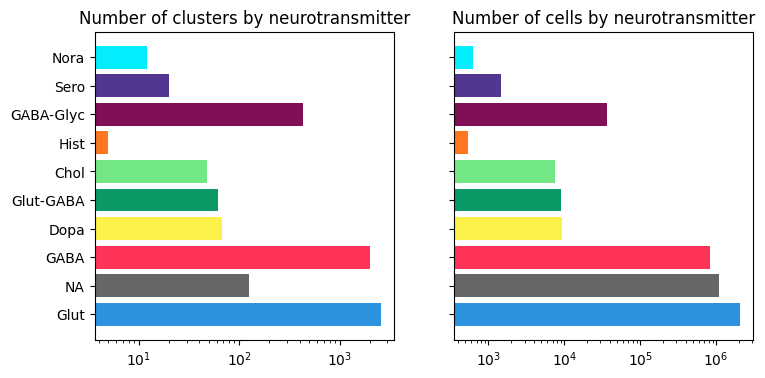

In [25]:
df = term_with_counts
level = 'neurotransmitter'
pred = (df['cluster_annotation_term_set_name'] == level )

bar_plot_by_level_and_type(term_with_counts, "neurotransmitter")

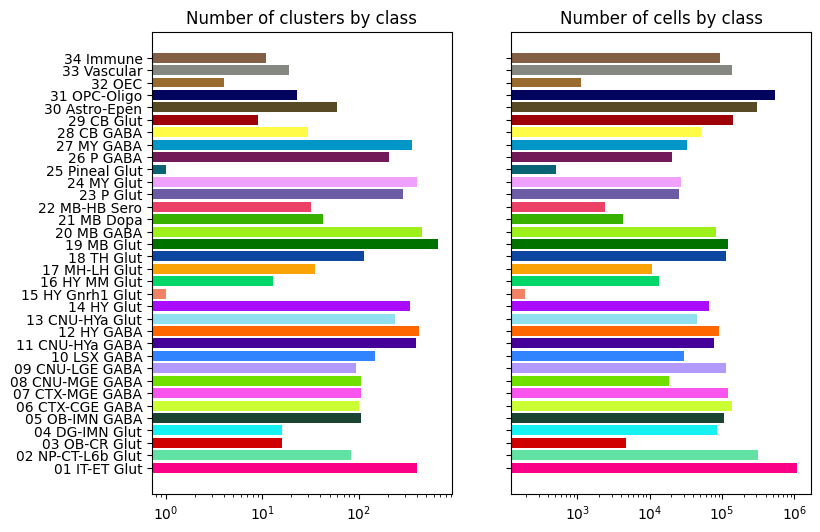

In [26]:
# Class level cluster and cell counts
bar_plot_by_level_and_type(term_with_counts, 'class', 8.5, 6)

# Prepare Data

In [41]:
# First, let's check what data files are available in the WMB-10Xv3 directory
try:
    wmb_files = abc_cache.get_directory_data('WMB-10Xv3')
    print("WMB-10Xv3 data files:")
    print(wmb_files)
except Exception as e:
    print(f"Error accessing WMB-10Xv3: {e}")

WMB-10Xv3 data files:
[PosixPath('/home/jantine/Data/AllenBrain/abc_atlas/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-CB-log2.h5ad'), PosixPath('/home/jantine/Data/AllenBrain/abc_atlas/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-CB-raw.h5ad'), PosixPath('/home/jantine/Data/AllenBrain/abc_atlas/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-CTXsp-log2.h5ad'), PosixPath('/home/jantine/Data/AllenBrain/abc_atlas/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-CTXsp-raw.h5ad'), PosixPath('/home/jantine/Data/AllenBrain/abc_atlas/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-HPF-log2.h5ad'), PosixPath('/home/jantine/Data/AllenBrain/abc_atlas/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-HPF-raw.h5ad'), PosixPath('/home/jantine/Data/AllenBrain/abc_atlas/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-HY-log2.h5ad'), PosixPath('/home/jantine/Data/AllenBrain/abc_atlas/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-HY-raw.h5ad'), PosixPath('/home/jantine/Data/AllenBrain/abc_

/home/jantine/miniconda3/envs/scvi_project/lib/python3.11/site-packages/abc_atlas_access/abc_atlas_cache/abc_project_cache.py:385: LargeDataSizeWarning: WMB-10Xv3 contains a significant amount of data.Continue this download only if you are sure you have enough space on your system.

	Total directory size = 176.41 GB


  warnings.warn(


In [42]:
# Try to load the main WMB-10Xv3 data
try:
    # Check if there's an h5ad file in the main directory
    wmb_data_paths = abc_cache.get_directory_data('WMB-10Xv3')
    
    if wmb_data_paths:
        # Look for h5ad files
        h5ad_paths = [path for path in wmb_data_paths if str(path).endswith('.h5ad')]
        
        if h5ad_paths:
            adata_path = h5ad_paths[0]
            print(f"Loading data from: {adata_path}")
            adata = sc.read_h5ad(adata_path)
            print(f"AnnData shape: {adata.shape}")
            print(f"AnnData observations: {adata.obs.columns.tolist()}")
            
            # Check if there's already a cluster column in the data
            cluster_col = None
            for col in adata.obs.columns:
                if 'cluster' in col.lower():
                    cluster_col = col
                    print(f"Found cluster column: {cluster_col}")
                    break
        else:
            print("No h5ad files found in WMB-10Xv3")
    else:
        print("No data files found in WMB-10Xv3")
except Exception as e:
    print(f"Error loading WMB-10Xv3 data: {e}")

Loading data from: /home/jantine/Data/AllenBrain/abc_atlas/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-CB-log2.h5ad
AnnData shape: (182026, 32285)
AnnData observations: ['cell_barcode', 'library_label', 'anatomical_division_label']


In [43]:
# If we successfully loaded the data, proceed with scVI analysis
if 'adata' in locals():
    # Basic preprocessing if needed
    if 'highly_variable' not in adata.var:
        print("\nPerforming basic preprocessing...")
        # Basic quality control
        sc.pp.filter_cells(adata, min_genes=200)
        sc.pp.filter_genes(adata, min_cells=3)
        
        # Calculate quality metrics
        adata.var['mt'] = adata.var_names.str.startswith('mt-')
        sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], inplace=True)
        
        # Filter cells based on QC metrics
        adata = adata[adata.obs.n_genes_by_counts < 5000, :]
        adata = adata[adata.obs.pct_counts_mt < 20, :]
        
        # Normalize and find highly variable genes
        sc.pp.normalize_total(adata, target_sum=1e4)
        sc.pp.log1p(adata)
        sc.pp.highly_variable_genes(adata, n_top_genes=2000)
    
    # Set up the model
    batch_key = 'library_label' if 'library_label' in adata.obs else None
    labels_key = cluster_col if cluster_col else None
    
    print(f"\nSetting up scVI with batch_key: {batch_key}, labels_key: {labels_key}")
    
    # Filter to highly variable genes if available
    if 'highly_variable' in adata.var:
        adata_hvg = adata[:, adata.var.highly_variable]
    else:
        adata_hvg = adata
    
    # Setup AnnData for scVI
    scvi.model.SCVI.setup_anndata(
        adata_hvg,
        batch_key=batch_key,
        labels_key=labels_key
    )
    
    # Create and train the model
    print("Training scVI model...")
    model = scvi.model.SCVI(adata_hvg)
    model.train(max_epochs=400, early_stopping=True)
    
    # Save the trained model
    model.save("scvi_model_allen_wmb")
    
    print("Model training complete!")
    
    # Get latent representation
    print("Getting latent representation...")
    latent = model.get_latent_representation()
    adata_hvg.obsm['X_scVI'] = latent
    
    # Run UMAP on the latent representation
    print("Computing UMAP...")
    sc.pp.neighbors(adata_hvg, use_rep='X_scVI')
    sc.tl.umap(adata_hvg)
    
    # Visualize results
    print("Visualizing results...")
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    if batch_key:
        sc.pl.umap(adata_hvg, color=batch_key, ax=ax[0], show=False, title=f"Batches ({batch_key})")
    else:
        ax[0].set_title("No batch information available")
        
    if labels_key:
        sc.pl.umap(adata_hvg, color=labels_key, ax=ax[1], show=False, title=f"Clusters ({labels_key})")
    else:
        if 'anatomical_division_label' in adata_hvg.obs:
            sc.pl.umap(adata_hvg, color='anatomical_division_label', ax=ax[1], show=False, 
                      title="Anatomical division")
        else:
            # If no labels, try to cluster the data
            print("No labels found, performing Leiden clustering...")
            sc.tl.leiden(adata_hvg, resolution=0.8)
            sc.pl.umap(adata_hvg, color='leiden', ax=ax[1], show=False, title="Leiden clusters")
            
    plt.tight_layout()
    plt.show()
else:
    # If we couldn't load the data directly, let's try a different approach
    print("\nAttempting to access data through abc_cache API...")
    
    # Let's list the available directories to find the correct path
    print("Available directories:")
    for directory in abc_cache.list_directories:
        if 'WMB-10Xv3' in directory:
            print(f" - {directory}")
    
    # This should help us understand the correct directory structure
    print("\nPlease verify the correct directory path for the WMB-10Xv3 data.")


Performing basic preprocessing...


/home/jantine/miniconda3/envs/scvi_project/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:216: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)



Setting up scVI with batch_key: library_label, labels_key: None


ValueError: Please run `adata = adata.copy()`

In [44]:
# List directories with WMB-10Xv3 in the name
print("\nDirectories containing WMB-10Xv3:")
wmb_directories = [d for d in abc_cache.list_directories if 'WMB-10Xv3' in d]
for directory in wmb_directories:
    print(f" - {directory}")

# Try to get information about the first WMB-10Xv3 directory
if wmb_directories:
    first_dir = wmb_directories[0]
    try:
        files = abc_cache.get_directory_data(first_dir)
        print(f"\nFiles in {first_dir}:")
        print(files)
    except Exception as e:
        print(f"Error accessing {first_dir}: {e}")


Directories containing WMB-10Xv3:
 - WMB-10Xv3

Files in WMB-10Xv3:
[PosixPath('/home/jantine/Data/AllenBrain/abc_atlas/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-CB-log2.h5ad'), PosixPath('/home/jantine/Data/AllenBrain/abc_atlas/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-CB-raw.h5ad'), PosixPath('/home/jantine/Data/AllenBrain/abc_atlas/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-CTXsp-log2.h5ad'), PosixPath('/home/jantine/Data/AllenBrain/abc_atlas/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-CTXsp-raw.h5ad'), PosixPath('/home/jantine/Data/AllenBrain/abc_atlas/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-HPF-log2.h5ad'), PosixPath('/home/jantine/Data/AllenBrain/abc_atlas/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-HPF-raw.h5ad'), PosixPath('/home/jantine/Data/AllenBrain/abc_atlas/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-HY-log2.h5ad'), PosixPath('/home/jantine/Data/AllenBrain/abc_atlas/expression_matrices/WMB-10Xv3/20230630/WMB-10Xv3-HY-raw.h5ad')

/home/jantine/miniconda3/envs/scvi_project/lib/python3.11/site-packages/abc_atlas_access/abc_atlas_cache/abc_project_cache.py:385: LargeDataSizeWarning: WMB-10Xv3 contains a significant amount of data.Continue this download only if you are sure you have enough space on your system.

	Total directory size = 176.41 GB


  warnings.warn(


In [ ]:
# Basic quality checks
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

# Calculate quality metrics
adata.var["mt"] = adata.var_names.str.startswith("mt-")  # Adjust for mouse mitochondrial genes
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

# Optional: Visualize QC metrics to determine thresholds
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.histplot(adata.obs.n_genes_by_counts, kde=False)
plt.title('Genes per Cell')

plt.subplot(1, 3, 2)
sns.histplot(adata.obs.total_counts, kde=False)
plt.title('UMI Counts per Cell')

plt.subplot(1, 3, 3)
sns.histplot(adata.obs.pct_counts_mt, kde=False, bins=40)
plt.title('% Mitochondrial Genes')
plt.tight_layout()
plt.show()

# Filter based on QC metrics (adjust thresholds after viewing the plots)
adata = adata[adata.obs.n_genes_by_counts < 5000, :]
adata = adata[adata.obs.pct_counts_mt < 20, :]

# Normalize and find highly variable genes
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000)